# __Exzeo Data Science Task__

___The given dataset is a classification problem as the output or target variable is categorized as either 0 or 1.In the given dataset, we have 14 features and a target column. So, First of all we will import all the necessary packages which will be required for executing the code in Python.___

In [6]:
#import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now first of all, we need to load the data using pandas read_csv function which will load the csv file and convert it into dataframe.

In [7]:
#function to load the csv file and convert it to dataframe
def csv_to_df(filepath):
    df = pd.read_csv(filepath, header = 0)
    return df

train = csv_to_df('/home/nikita/Documents/DataScienceTaskExzeo/exzeo_training_data.csv')
test = csv_to_df('/home/nikita/Documents/DataScienceTaskExzeo/exzeo_test_data.csv')


Before, proceeding with any of the computation steps , we need to understand the dataset.
so for that use info method. We have 5001 enteries and 15 columns.
In the train dataset, We have 4 categorical variables column i.e x1,x2,x5,x13 and rest all the columns are numerical columns.

In the test dataset, we have 998 enteries and 15 columns.

In [8]:
print train.info()
print test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 15 columns):
ID     5001 non-null object
x1     4985 non-null object
x2     4995 non-null float64
x3     4988 non-null float64
x4     3504 non-null float64
x5     4997 non-null object
x6     4708 non-null float64
x7     3504 non-null float64
x8     4998 non-null float64
x9     4995 non-null float64
x10    4997 non-null float64
x11    4992 non-null float64
x12    3504 non-null float64
x13    3874 non-null object
y      5001 non-null int64
dtypes: float64(10), int64(1), object(4)
memory usage: 586.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 15 columns):
ID     998 non-null object
x1     997 non-null object
x2     997 non-null float64
x3     992 non-null float64
x4     714 non-null float64
x5     997 non-null object
x6     920 non-null float64
x7     713 non-null float64
x8     998 non-null int64
x9     997 non-null float64
x10    997 non

### EDA( Exploratory Data Analysis)

For better understanding of the train and test dataset, plot histogram and boxplot of all the columns which will help in understanding the nature of the dataset.
we can clearly observe that the dataset is not uniformly distributed. It is either right Skewed or Left skewed.

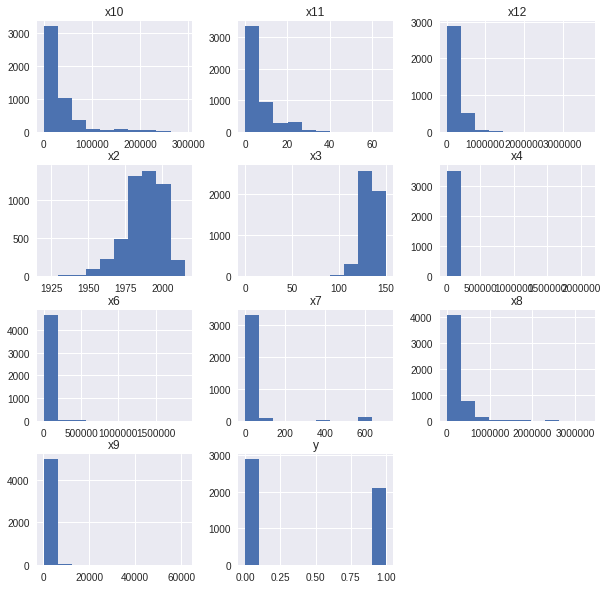

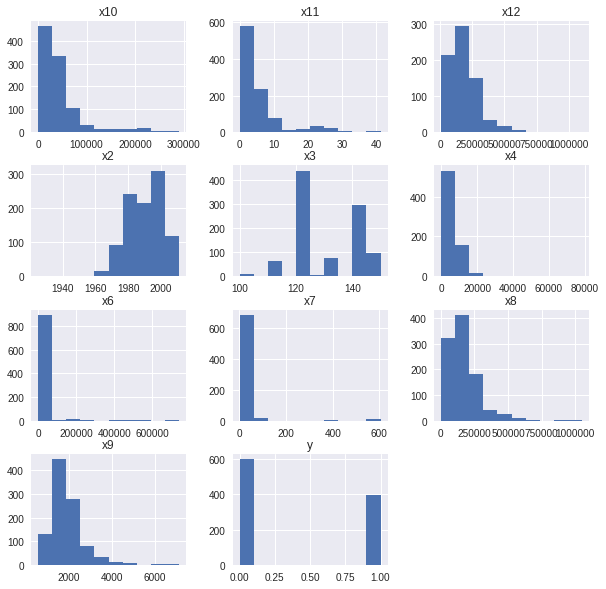

In [9]:
#plotting a histogram for better understanding of data
train.hist(figsize = (10,10))
test.hist(figsize=(10,10))
# test.plot(kind = 'box', subplots = True, sharex =False, sharey = False, figsize = (10,50))
plt.show()

we can see that data is not uniformly distributed. It is either left skewed or right skewed.

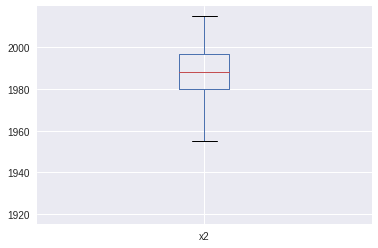

In [10]:
train.boxplot(column='x2')

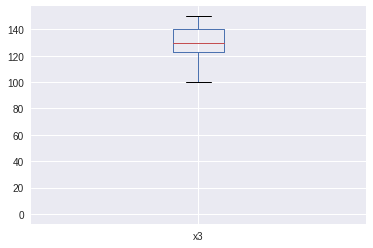

In [11]:
train.boxplot(column = 'x3')

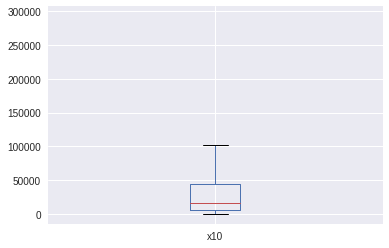

In [12]:
train.boxplot(column = 'x10')

In [13]:
train.head()

,ID,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,E3922,A,2011.0,110.0,NaN,B,1888488.0,NaN,1490349.0,61392.0,53803.2,7.96,NaN,F,0
1,E1828,A,1985.0,130.0,1.0,C,15001.0,3.0,645316.0,10305.0,1795.2,8.45,620347.0,NaN,1
2,E2903,C,1998.0,130.0,2.0,B,19999.0,33.0,264982.0,8438.0,16368.0,4.94,270979.0,NaN,0
3,E3187,A,2004.0,130.0,1.0,C,14408.0,6.0,772409.0,8146.0,633.6,17.73,823784.0,NaN,0
4,E3518,E,1996.0,130.0,1.0,C,15400.0,3.0,853138.0,7999.0,105.6,6.85,830863.0,NaN,0


In [14]:
train.describe()

,x2,x3,x4,x6,x7,x8,x9,x10,x11,x12,y
count,4995.000000,4988.000000,3.504000e+03,4.708000e+03,3504.000000,4.998000e+03,4995.000000,4997.000000,4992.000000,3.504000e+03,5001.000000
mean,1987.040641,130.728348,6.079591e+03,1.588907e+04,36.719463,2.316430e+05,2148.621421,34008.974641,6.413574,2.578584e+05,0.420316
std,12.923690,11.027291,3.772712e+04,4.853438e+04,108.926484,2.176715e+05,1265.039762,47211.113103,7.733678,2.344689e+05,0.493659
min,1920.000000,0.000000,0.000000e+00,2.000000e+00,1.000000,1.000000e+00,338.000000,4.980000,0.020000,1.000000e+00,0.000000
25%,1980.000000,123.000000,1.000000e+00,6.839750e+03,4.000000,1.091005e+05,1503.000000,5649.600000,1.030000,1.257650e+05,0.000000
50%,1988.000000,130.000000,1.171000e+03,9.472000e+03,9.000000,1.697265e+05,1931.000000,16737.600000,3.350000,1.947885e+05,0.000000
75%,1997.000000,140.000000,8.105000e+03,1.306800e+04,27.000000,2.794100e+05,2525.000000,44193.600000,8.232500,3.143922e+05,1.000000
max,2015.000000,150.000000,2.099200e+06,1.888488e+06,706.000000,3.290300e+06,61392.000000,292670.400000,66.730000,3.643400e+06,1.000000


Now after visualizing the dataset, We need to clean the data. So,finding all the uniques values present in each column of test and train dataset.

In [15]:
# to compute unique values of all the columns in train and test dataset
for col in train:
    print train[col].unique()

['E3922' 'E1828' 'E2903' ..., 'E2134' 'E2403' 'E3480']
['A' 'C' 'E' 'B' 'S' 'M' nan]
[ 2011.  1985.  1998.  2004.  1996.  2002.  1997.  1995.  1994.  2005.
  2001.  1983.  1989.  1993.  1976.  1986.  1984.  1991.  1999.  2000.
  1988.  1990.  1972.  1981.  1982.  2008.  1970.  2003.  1987.  1979.
  1980.  2014.  2013.  1965.  2006.  1992.  2010.  1960.  1967.  1971.
  1958.  1969.  1954.  1973.  1975.  2009.  1977.  2007.  1925.  1978.
  1968.  1955.  1963.  1962.  1953.  1956.  1959.  1952.  1974.  1950.
  1961.  1951.  1964.  1966.  2015.  1957.  2012.  1931.  1935.  1936.
  1933.  1949.  1939.  1924.  1937.  1938.  1942.  1920.  1940.  1929.
  1948.  1947.  1946.    nan]
[ 110.  130.  123.  136.  135.  146.  140.  120.  150.  100.  131.  126.
  128.  132.  129.  119.   nan  115.    0.  133.  125.  124.  117.]
[             nan   1.00000000e+00   2.00000000e+00 ...,   5.77500000e+03
   3.38000000e+02   2.41500000e+04]
['B' 'C' nan]
[  1.88848800e+06   1.50010000e+04   1.99990000e+04 

In [16]:
# To compute the no. of times each obsevation is occuring in each column
for col in train:
    print pd.value_counts(train[col])

E1277    1
E5124    1
E437     1
E434     1
E435     1
E5120    1
E5121    1
E438     1
E5123    1
E5125    1
E431     1
E891     1
E5127    1
E5300    1
E5301    1
E1319    1
E5303    1
E5304    1
E436     1
E430     1
E4780    1
E898     1
E4012    1
E892     1
E893     1
E4017    1
E4016    1
E896     1
E897     1
E899     1
        ..
E3646    1
E3644    1
E4865    1
E4592    1
E4593    1
E513     1
E512     1
E515     1
E514     1
E517     1
E3483    1
E4607    1
E3481    1
E4601    1
E4868    1
E4869    1
E3822    1
E3845    1
E3183    1
E4889    1
E399     1
E4608    1
E4609    1
E3489    1
E3488    1
E3540    1
E3485    1
E4603    1
E765     1
E1106    1
Name: ID, dtype: int64
C    2943
A    1100
B     636
E     198
M      97
S      11
Name: x1, dtype: int64
1988.0    247
2000.0    215
1983.0    195
1990.0    181
1998.0    177
1989.0    177
1978.0    171
1993.0    171
1985.0    157
1995.0    155
1994.0    154
1996.0    147
1999.0    144
1984.0    142
1981.0    140
1980.0    133

Data cleaning involves computing missing values.
As we can see we have missing value present almost in each column.
So we need to fill these missing values by various techniques.

In [17]:
#To calculate how many NAN values are present in each column of train and test dataset.
print train.isnull().sum()
print test.isnull().sum()

ID        0
x1       16
x2        6
x3       13
x4     1497
x5        4
x6      293
x7     1497
x8        3
x9        6
x10       4
x11       9
x12    1497
x13    1127
y         0
dtype: int64
ID       0
x1       1
x2       1
x3       6
x4     284
x5       1
x6      78
x7     285
x8       0
x9       1
x10      1
x11      4
x12    284
x13    155
y        0
dtype: int64


In [18]:
test

,ID,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,E343,A,1981.0,140.0,NaN,B,217896.0,NaN,595903,7137.0,88440.0,7.13,NaN,F,1
1,E344,A,1981.0,140.0,NaN,B,217896.0,NaN,595903,7137.0,88440.0,7.13,NaN,F,1
2,E345,A,1981.0,140.0,NaN,B,217896.0,NaN,595903,7137.0,88440.0,7.13,NaN,F,1
3,E346,A,1981.0,140.0,NaN,B,217896.0,NaN,595903,7137.0,88440.0,7.13,NaN,F,1
4,E8,A,2000.0,130.0,NaN,B,406204.0,NaN,420147,6045.0,61406.4,8.44,NaN,NaN,1
5,E9,A,2000.0,130.0,NaN,B,406204.0,NaN,420147,6045.0,61406.4,8.44,NaN,NaN,1
6,E174,A,2000.0,140.0,14049.0,C,14049.0,7.0,1049690,5448.0,92664.0,2.15,1101990.0,M,1
7,E5439,C,1996.0,130.0,1.0,B,13190.0,3.0,268096,5144.0,11616.0,8.75,284994.0,NaN,0
8,E5955,C,2009.0,120.0,6588.0,B,6444.0,3.0,502585,5101.0,2164.8,0.67,552019.0,F,0
9,E5655,A,1995.0,130.0,1.0,B,11627.0,22.0,317495,5021.0,28300.8,4.82,345703.0,NaN,0


Dropping the nan values which will not impact our dataset as the nan values in these particular columns mentioned below is less
so they will not effect the data analysis much.

In [19]:
# Dropping the nan values from feature columns
train = train.dropna(subset=['x1','x2','x5','x8','x9','x10','x11','x13'])
test = test.dropna(subset=['x1','x2','x5','x8','x9','x10','x11','x13'])
test

,ID,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,E343,A,1981.0,140.0,NaN,B,217896.0,NaN,595903,7137.0,88440.0,7.13,NaN,F,1
1,E344,A,1981.0,140.0,NaN,B,217896.0,NaN,595903,7137.0,88440.0,7.13,NaN,F,1
2,E345,A,1981.0,140.0,NaN,B,217896.0,NaN,595903,7137.0,88440.0,7.13,NaN,F,1
3,E346,A,1981.0,140.0,NaN,B,217896.0,NaN,595903,7137.0,88440.0,7.13,NaN,F,1
6,E174,A,2000.0,140.0,14049.0,C,14049.0,7.0,1049690,5448.0,92664.0,2.15,1101990.0,M,1
8,E5955,C,2009.0,120.0,6588.0,B,6444.0,3.0,502585,5101.0,2164.8,0.67,552019.0,F,0
10,E5666,A,2000.0,120.0,1.0,B,13540.0,7.0,222946,4914.0,34425.6,5.22,270266.0,M,0
11,E312,C,1992.0,140.0,23166.0,C,23166.0,4.0,588240,4613.0,56812.8,5.58,600700.0,M,1
12,E167,E,2010.0,120.0,44557.0,B,45703.0,11.0,477135,4557.0,33580.8,2.33,478697.0,M,1
14,E5920,C,1983.0,123.0,NaN,C,17237.0,NaN,660031,4446.0,1108.8,1.38,NaN,M,0


Removing the missing values by filling 0, mean and mode depending on the column.

In [20]:
#Missing value computation 
train['x4'] = train['x4'].fillna(0)
test['x4'] = test['x4'].fillna(0)
train['x6'] = train['x6'].fillna(0)
test['x6'] = test['x6'].fillna(0)
train['x12'] = train['x12'].fillna(0)
test['x12'] = test['x12'].fillna(0)
train['x3'] = train['x3'].fillna(train['x3'].mean())
test['x3'] = test['x3'].fillna(test['x3'].mean())
train['x7'] = train['x7'].fillna(train['x7'].mode()[0])
test['x7'] = test['x7'].fillna(test['x7'].mode()[0])
train = train.drop(train.columns[0], axis=1)
test = test.drop(test.columns[0], axis=1)

/home/nikita/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/nikita/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nikita/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

Converting all the categorical variables into numerical variables by using mapping method.

In [21]:
#Mapping of categorical variable into numerical variable
train['x1'] = train['x1'].map({'A':1, 'C':2, 'E':3, 'B':4, 'S':5, 'M':6})
train['x5'] = train['x5'].map({'B':0, 'C':1})
train['x13'] = pd.get_dummies(train['x13'])
test['x1'] = test['x1'].map({'A':1, 'C':2, 'E':3, 'B':4, 'S':5, 'M':6})
test['x5'] = test['x5'].map({'B':0, 'C':1})
test['x13'] = pd.get_dummies(test['x13'])

In [22]:
train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,1,2011.0,110.0,0.0,0,1888488.0,4.0,1490349.0,61392.0,53803.20,7.96,0.0,1,0
5,1,1998.0,123.0,0.0,0,104095.0,4.0,658061.0,7765.0,4118.40,0.91,0.0,0,1
9,3,1994.0,123.0,0.0,0,45159.0,4.0,914502.0,7050.0,5068.80,0.19,0.0,0,1
10,3,1994.0,123.0,0.0,0,45159.0,4.0,914502.0,7050.0,5068.80,0.19,0.0,0,1
11,3,1994.0,123.0,0.0,0,45159.0,4.0,914502.0,7050.0,5068.80,0.19,0.0,0,1
12,1,2005.0,136.0,80.0,1,12800.0,9.0,1079694.0,7050.0,52.80,24.70,1110753.0,0,0
14,2,1983.0,135.0,100.0,1,11000.0,9.0,309539.0,6868.0,211.20,22.24,293390.0,0,0
18,3,1998.0,140.0,0.0,0,20444.0,4.0,992664.0,6577.0,46886.40,7.83,0.0,0,1
21,1,1984.0,123.0,0.0,1,73168.0,4.0,2367455.0,6301.0,264.00,0.46,0.0,1,1
22,1,1984.0,123.0,0.0,1,73168.0,4.0,2367455.0,6301.0,264.00,0.46,0.0,1,1


In [23]:
test

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,1,1981.0,140.0,0.0,0,217896.0,4.0,595903,7137.0,88440.0,7.13,0.0,1,1
1,1,1981.0,140.0,0.0,0,217896.0,4.0,595903,7137.0,88440.0,7.13,0.0,1,1
2,1,1981.0,140.0,0.0,0,217896.0,4.0,595903,7137.0,88440.0,7.13,0.0,1,1
3,1,1981.0,140.0,0.0,0,217896.0,4.0,595903,7137.0,88440.0,7.13,0.0,1,1
6,1,2000.0,140.0,14049.0,1,14049.0,7.0,1049690,5448.0,92664.0,2.15,1101990.0,0,1
8,2,2009.0,120.0,6588.0,0,6444.0,3.0,502585,5101.0,2164.8,0.67,552019.0,1,0
10,1,2000.0,120.0,1.0,0,13540.0,7.0,222946,4914.0,34425.6,5.22,270266.0,0,0
11,2,1992.0,140.0,23166.0,1,23166.0,4.0,588240,4613.0,56812.8,5.58,600700.0,0,1
12,3,2010.0,120.0,44557.0,0,45703.0,11.0,477135,4557.0,33580.8,2.33,478697.0,0,1
14,2,1983.0,123.0,0.0,1,17237.0,4.0,660031,4446.0,1108.8,1.38,0.0,0,0


Now the dataset is ready for doing prediction and we need to split the data first into X and Y train and test data.
and by using the inbuilt sklearn module first we will try to to evaluate the result and then later by using logistic regression function.
So first separate feature and target variable.
And the call the logistic regression classifier. fit the model on X_train, y_train 
and now predict y from X_test.
So check whether you have correctly predicted use, accuracy score which is again sklearn module to check and compare y_test with y_predicted.

In [24]:
#evaluating the logistic model using sklearn
#splitting X_train, X_test, y_train, y_test
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train = train.iloc[:,0:13]
y_train = train.iloc[:,13]
X_test = test.iloc[:,0:13]
y_test = test.iloc[:,13]

In [25]:
#fitting the model and calculating accuracy.
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.63064133016627077

In [26]:
# if taking only categorical features
X_train = train[['x1','x5','x13']]
y_train = train.iloc[:,13]
X_test = test[['x1','x5','x13']]
y_test = test.iloc[:,13]
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.62826603325415675

In [27]:
### if taking only x1 i.e year column into consideration

X_train = train[['x1']]
y_train = train.iloc[:,13]
X_test = test[['x1']]
y_test = test.iloc[:,13]
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.64251781472684089

In [28]:
### if taking all numerical column into consideration

X_train = train[['x2','x3','x4','x6','x7','x8','x9','x10','x11']]
y_train = train.iloc[:,13]
X_test = test[['x2','x3','x4','x6','x7','x8','x9','x10','x11']]
y_test = test.iloc[:,13]
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.63182897862232779

__LOGISTIC REGRESSION FUNCTION__

Here I have tried building the logistic regression function:
    Logistic regression: log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:
$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the logit function.

Probability is sometimes written as pi:
$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the logistic function:
$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

    Logistic regression outputs the probabilities of a specific class
    Those probabilities can be converted into class predictions

The logistic function has some nice properties:

    Takes on an "s" shape
    Output is bounded by 0 and 1


In [29]:
# Making Logistic regression Function

# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


In [30]:
# exponential function: e^1
np.exp(1)

2.7182818284590451

In [31]:
# time needed to grow 1 unit to 2.718 units
np.log(2.718)

0.99989631572895199

In [32]:
np.log(np.exp(5))

5.0

In [33]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


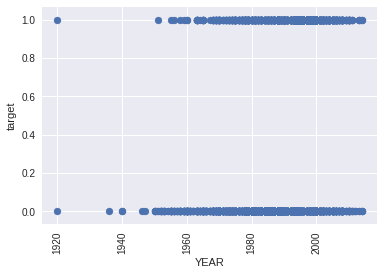

In [34]:
# plot the predicted probabilities again
plt.scatter(train['x2'], train['y'])

plt.xlabel('YEAR')
plt.xticks(rotation='vertical')
plt.ylabel('target')

In [35]:
# compute predicted log-odds for year = 2000 using the equation
logodds = clf.intercept_ + clf.coef_[0] * 2000
logodds



array([ -2.27696543e+00,   3.87107223e+00,  -4.21082911e-03,
        -1.09545549e-03,  -1.40003422e+01,  -3.69198392e-03,
         2.12174494e+00,  -3.10228775e-03,  -1.31465006e+01])

In [36]:
# convert log-odds to odds
odds = np.exp(logodds)
odds



array([  1.02595067e-01,   4.79938189e+01,   9.95798024e-01,
         9.98905144e-01,   8.31244236e-07,   9.96314823e-01,
         8.34568752e+00,   9.96902519e-01,   1.95230346e-06])

In [42]:
#convert odds to probability
prob = odds/(1 + odds)
prob

0.99205808391674566

In [43]:
# increasing year by 1 (so that year =2001) increases the log-odds by 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.99205808391674566

In [39]:
# examine the coefficient for year
clf.coef_[0]


array([ -1.13844476e-03,   1.93557407e-03,  -2.06746110e-06,
        -5.09774289e-07,  -7.00013314e-03,  -1.80803850e-06,
         1.06091042e-03,  -1.51319042e-06,  -6.57321236e-03])

In [40]:
# convert log-odds to probability
logodds = clf.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([ 0.49998102])

__Findings__ : we can see that the accuracy score is high when 'x2' column i.e Year column is alone taken into consideration. The other features are not putting much
    impact on the target variable.
    The dataset is biased as it is not uniformly distributed so for better model and prediction we shuold have normally distributed data and more clear feature variables.